# Introducción a la Ciencia de Datos: Tarea 1

Este notebook contiene el código de base para realizar la Tarea 1 del curso. Puede copiarlo en su propio repositorio y trabajar sobre el mismo.
Las **instrucciones para ejecutar el notebook** están en la [página inicial del repositorio](https://gitlab.fing.edu.uy/maestria-cdaa/intro-cd).

Se utiliza el lenguaje Python y la librería Pandas. Si no tiene ninguna familiaridad con la librería, se recomienda realizar algún tutorial introductorio (ver debajo).
También se espera que los alumnos sean proactivos a la hora de consultar las documentaciones de las librerías y del lenguaje, para entender el código provisto.
Además de los recursos provistos en la [página del curso](https://eva.fing.edu.uy/course/view.php?id=1378&section=1), los siguientes recursos le pueden resultar interesantes:
 - [Pandas getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) y [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html): Son parte de la documentación en la página oficial de Pandas.
 - [Kaggle Learn](https://www.kaggle.com/learn): Incluye tutoriales de Python y Pandas.


Si desea utilizar el lenguaje R y está dispuesto a no utilizar (o traducir) este código de base, también puede hacerlo.

En cualquier caso, **se espera que no sea necesario revisar el código para corregir la tarea**, ya que todos los resultados y análisis relevantes deberían estar en el **informe en formato PDF**.

## Cargar bibliotecas (dependencias)
Recuerde instalar los requerimientos (`requirements.txt`) en el mismo entorno donde está ejecutando este notebook (ver [README](https://github.com/DonBraulio/introCD)).

In [217]:
from time import time
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Agregue aqui el resto de las librerias que necesite
import re
from collections import Counter

## Lectura de Datos

In [218]:
# DataFrame con todos los discursos:
pd.set_option('display.max_rows', None)
#df_speeches = pd.read_csv('../data/us_2020_election_speeches.csv')
df_speeches = pd.read_csv('data/us_2020_election_speeches.csv')
df_speeches

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\r\nHow great is it to be...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech
6,Mike Pence,Mike Pence Campaign Speech Miami Transcript Oc...,"Pedro Fuentes Cid: (01:08)\r\nYeah, my name is...","Oct 15, 2020","Miami, Florida",Campaign Speech
7,Donald Trump,"Donald Trump Rally Des Moines, Iowa Transcript...",President Donald J. Trump: (14:59)\r\nThank yo...,"Oct 14, 2020","Des Moines, Iowa",Campaign Speech
8,Mike Pence,"Mike Pence Campaign Speech Grand Rapids, Michi...","Mike Pence: (02:27)\r\nWell hello, Michigan. T...","Oct 14, 2020","Grand Rapids, Michigan",Campaign Speech
9,Joe Biden,"Joe Biden Mobilization Campaign Event Miramar,...","Speaker 1: (01:06)\r\nPlease welcome, Damian F...","Oct 13, 2020","Miramar, Florida",Campaign Speech


# Parte 1: Cargado y Limpieza de Datos

## Exploración de Datos

In [225]:
# TODO: Analice la cantidad de discursos por candidato

# En primer lugar visualizamos todos los diferentes speakers
Nspeech_nc = df_speeches['speaker'].value_counts(dropna=False)
#print(Nspeech_nc)

# Separamos speakers múltiples
df_speeches['speaker'] = df_speeches['speaker'].str.split(',')
df_speeches = df_speeches.explode('speaker')
df_speeches['speaker'] = df_speeches['speaker'].str.strip()

# Por inspección visual, en las demás columnas detectamos que el único error son datos faltantes
# Entonces los buscamos:
count_nan = df_speeches.isna().sum()
#print(count_nan)

# Tomamos los 5 candidatos con más discursos
# Contamos la cantidad de speeches por speaker (considerando los speeches compartidos)
presidents = ["Joe Biden", "Donald Trump", "Mike Pence", "Bernie Sanders", "Kamala Harris"]
def count_mentions(df, column, names):
    count = []
    for name in names:
        counter = df[column].astype(str).str.contains(name, case=False, na=False).sum()
        count.append([name, int(counter)]) 
    return count
Nspeech = count_mentions(df_speeches, 'speaker', presidents)
# La función anterior también considera a Donald Trump Jr. (hijo)
Nspeech[1][1] = Nspeech[1][1] -1
#print(Nspeech)

# df_speeches_top_5 = ...
def presencia(df, column, names):
    return df[column].astype(str).apply(lambda x: 1 if any(name in x for name in names) else 0)
boolean = presencia(df_speeches, 'speaker', presidents)    

df_speeches_top_5 = df_speeches[boolean == 1]
# Sacamos a Donald Trump Jr.
df_speeches_top_5 = df_speeches_top_5.drop(136)
df_speeches_top_5

,speaker,title,text,date,location,type
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\r\nHello, Michigan. Hi, how...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\r\nThank you. What a ...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\r\nHey, and wel...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\r\nIt’s nothing but ...,"Oct 15, 2020",NBC,Town Hall
5,Donald Trump,"Donald Trump Campaign Rally Greenville, NC Tra...",Donald Trump: (01:25)\r\nThank you very much. ...,"Oct 15, 2020","Greenville, North Carolina",Campaign Speech
6,Mike Pence,Mike Pence Campaign Speech Miami Transcript Oc...,"Pedro Fuentes Cid: (01:08)\r\nYeah, my name is...","Oct 15, 2020","Miami, Florida",Campaign Speech
7,Donald Trump,"Donald Trump Rally Des Moines, Iowa Transcript...",President Donald J. Trump: (14:59)\r\nThank yo...,"Oct 14, 2020","Des Moines, Iowa",Campaign Speech
8,Mike Pence,"Mike Pence Campaign Speech Grand Rapids, Michi...","Mike Pence: (02:27)\r\nWell hello, Michigan. T...","Oct 14, 2020","Grand Rapids, Michigan",Campaign Speech
9,Joe Biden,"Joe Biden Mobilization Campaign Event Miramar,...","Speaker 1: (01:06)\r\nPlease welcome, Damian F...","Oct 13, 2020","Miramar, Florida",Campaign Speech
10,Donald Trump,"Donald Trump Rally Johnstown, PA Transcript Oc...","President Trump: (01:02)\r\nHello, Johnstown. ...","Oct 13, 2020","Johnstown, Pennsylvania",Campaign Speech


## Visualizaciones

<function matplotlib.pyplot.show(close=None, block=None)>

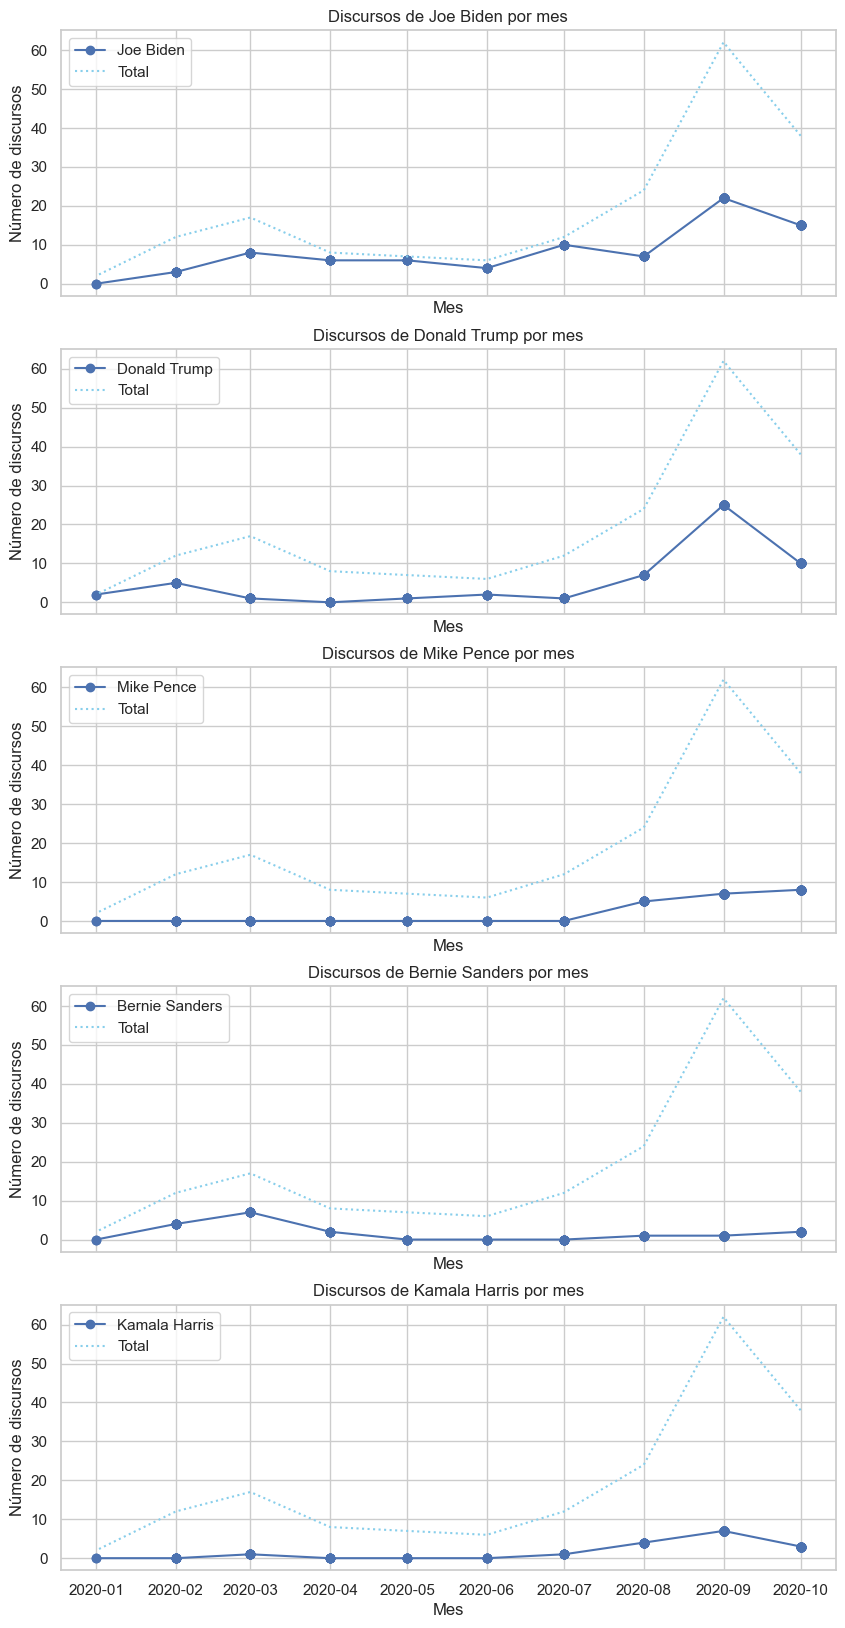

In [228]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 

# Agrupamos por mes en vez de por día
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'], format='mixed')
df_speeches_top_5['month'] = df_speeches_top_5['date'].dt.to_period("M").dt.to_timestamp()

# Reseteamos el índice
df_count_pres = df_speeches_top_5.groupby(['month', 'speaker']).size().reset_index(name='count')

# Total discursos por mes
total_month = df_count_pres.groupby('month')['count'].sum().reindex(df_speeches_top_5['month'], fill_value=0).reset_index()

# Graficamos discursos totales y por presidente
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [10,20], sharex= True)
for i, president in enumerate(presidents):
    df_presidents = df_count_pres[df_count_pres['speaker'] == president]
    df_presidents = df_presidents.set_index('month').reindex(df_speeches_top_5['month'], fill_value=0).reset_index() 
    # Rellena los meses en los que no haya datos con el valor cero
    df_presidents.rename(columns={'index': 'month'}, inplace=True)
    axes[i].plot(df_presidents['month'], df_presidents['count'], marker='o', label=president) # Por presidente
    axes[i].plot(total_month['month'], total_month['count'], linestyle=':', color='skyblue', label='Total') # Total
    axes[i].set_title(f'Discursos de {president} por mes')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Número de discursos')
    axes[i].legend()
plt.show

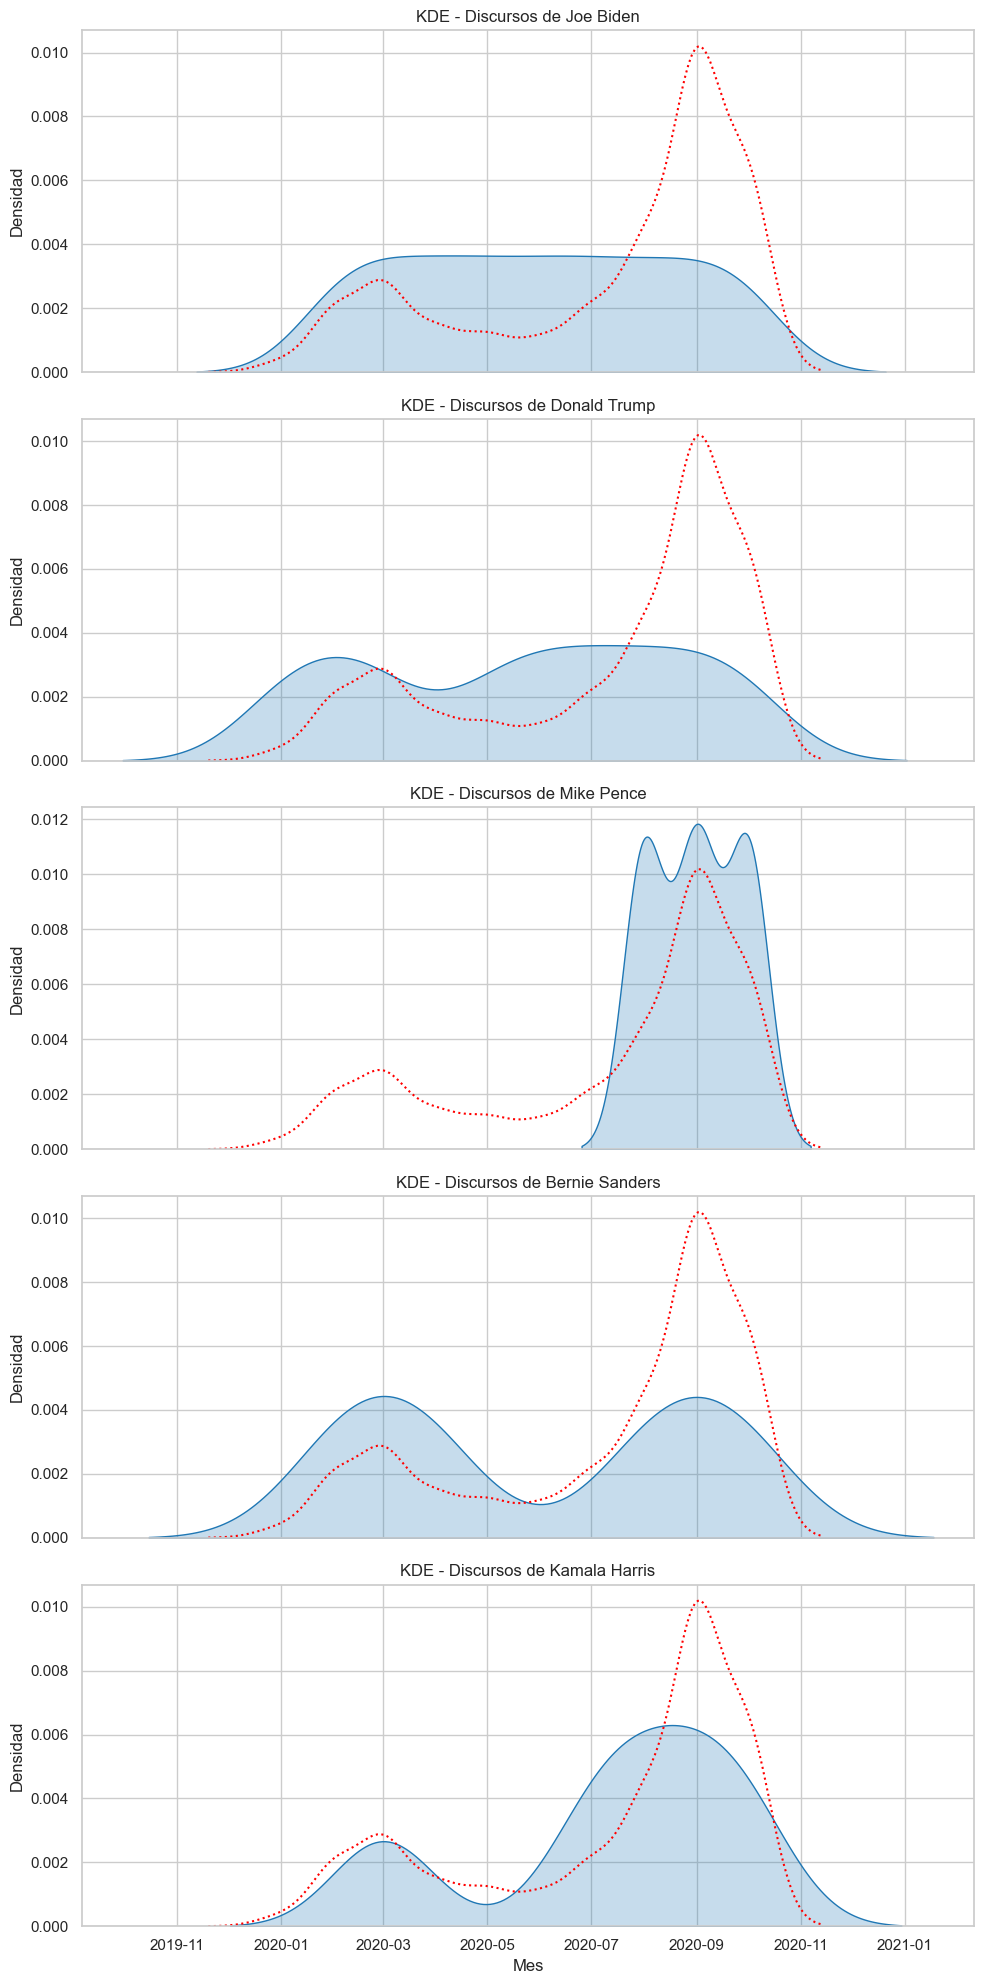

In [229]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 

length = len(df_speeches_top_5)

# Graficamos discursos totales y por presidente
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [10,20], sharex= True)
for i, president in enumerate(presidents):
    df_presidents = df_count_pres[df_count_pres['speaker'] == president]
    weight_pres = len(df_presidents)/length
    sns.kdeplot(
        data=total_month, # Total
        x='month',
        ax=axes[i],
        bw_adjust=0.5,
        linestyle=':',
        color='red',
        label='Total')
    sns.kdeplot(
        data=df_presidents, # Por presidente
        x='month',
        ax=axes[i],
        weights=weight_pres,
        fill=True,
        bw_adjust=0.5,
        label=president,
        color='tab:blue')
    axes[i].set_title(f'KDE - Discursos de {president}')
    axes[i].set_ylabel('Densidad')
axes[-1].set_xlabel('Mes')
plt.tight_layout()
plt.show()

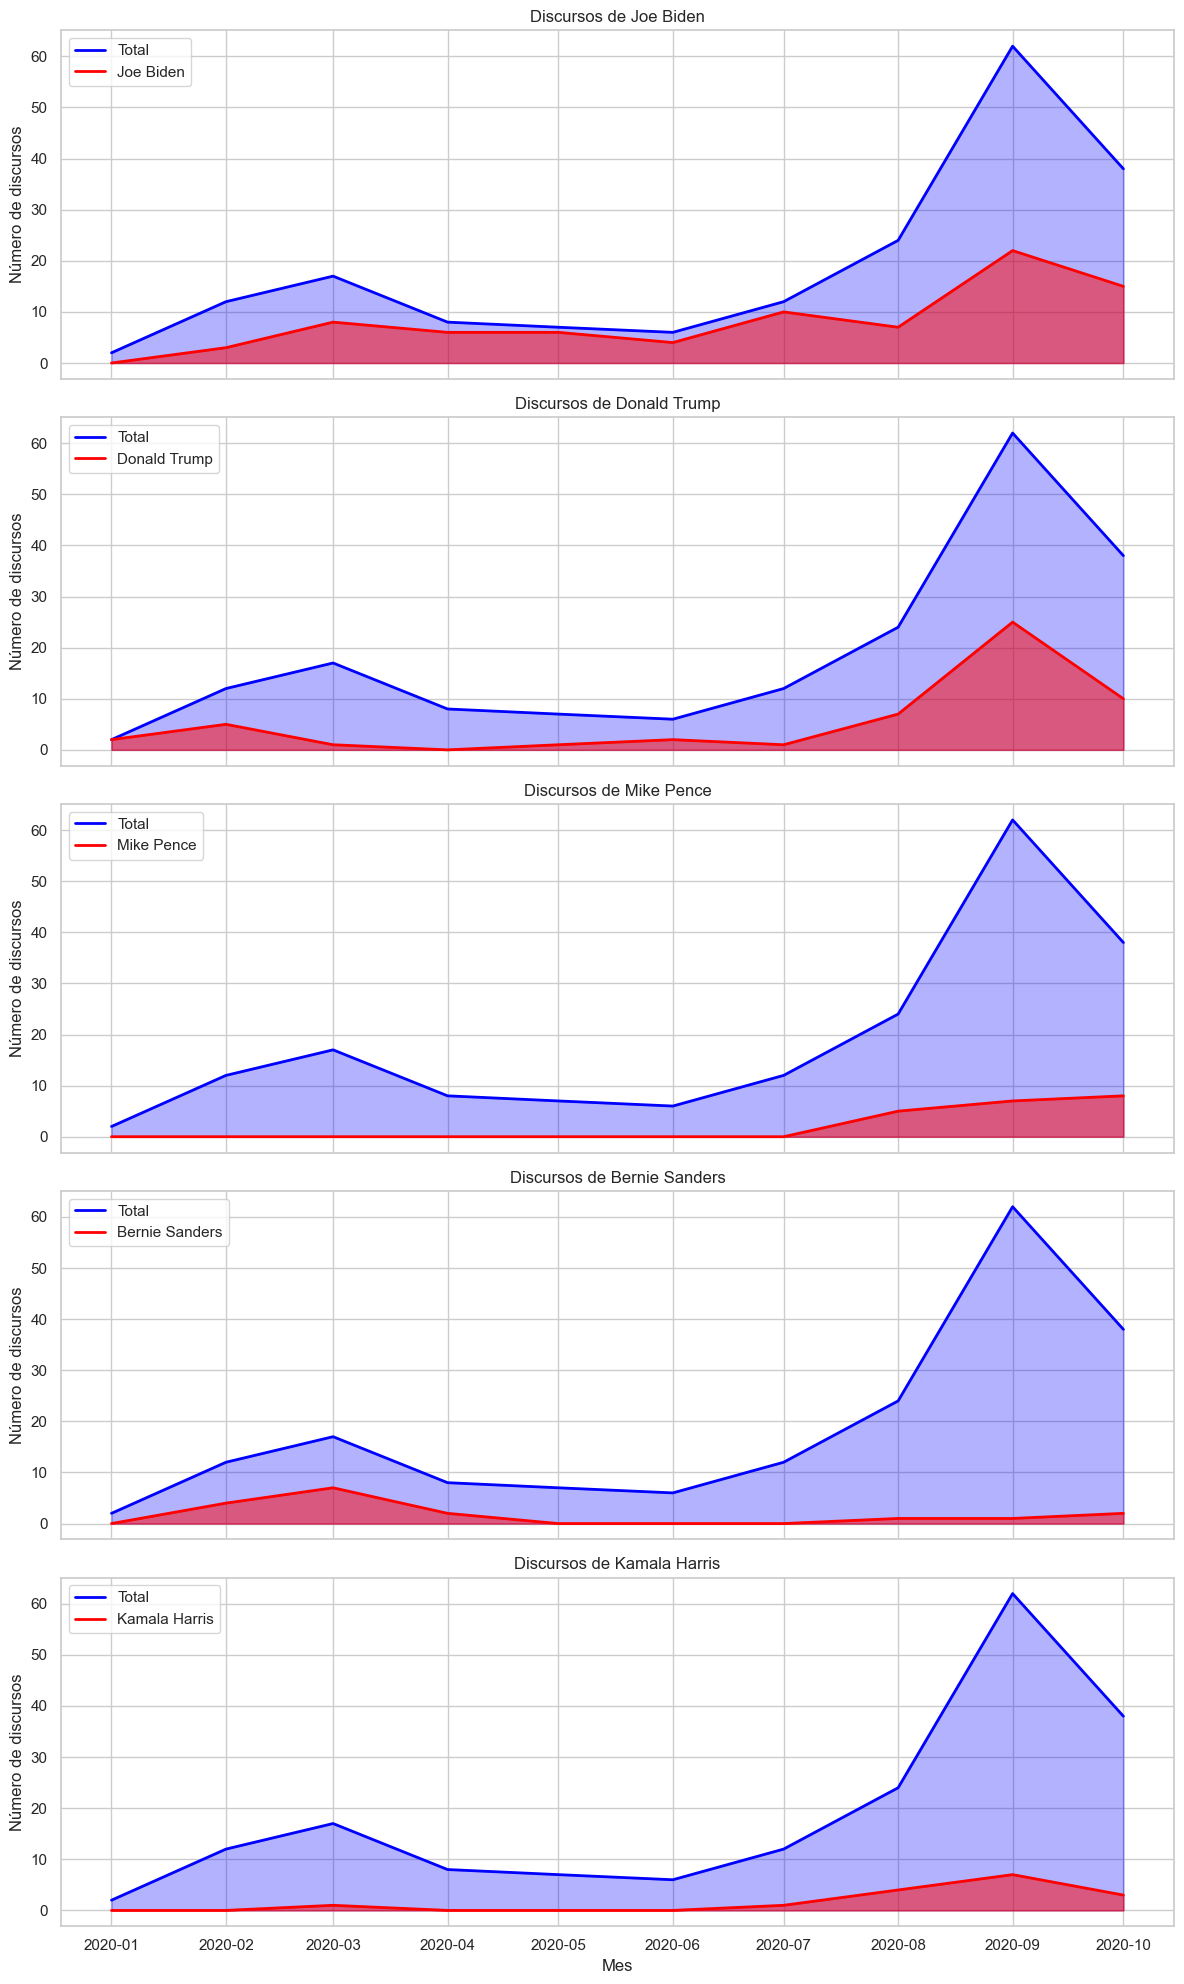

In [237]:
# TODO: Visualización de los discursos de cada candidato a lo largo del tiempo 

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=[12, 20], sharex=True)

for i, president in enumerate(presidents):
    ax = axes[i]
    df_presidents = df_count_pres[df_count_pres['speaker'] == president]
    
    # Rellenamos los meses en los que no haya datos con el valor cero
    df_presidents = df_presidents.set_index('month').reindex(df_speeches_top_5['month'], fill_value=0).reset_index()
    
    # Graficamos el total de discursos con área rellena
    ax.plot(total_month['month'], total_month['count'], color='blue', label='Total', lw=2)
    ax.fill_between(total_month['month'], total_month['count'], color='blue', alpha=0.3)
    
    # Graficamos los discursos por presidente con área rellena
    ax.plot(df_presidents['month'], df_presidents['count'], label=president, color='red', lw=2)
    ax.fill_between(df_presidents['month'], df_presidents['count'], color='red', alpha=0.5)
    
    ax.set_title(f'Discursos de {president}')
    ax.set_ylabel('Número de discursos')
    ax.legend()

axes[-1].set_xlabel('Mes')
plt.tight_layout()
plt.show()

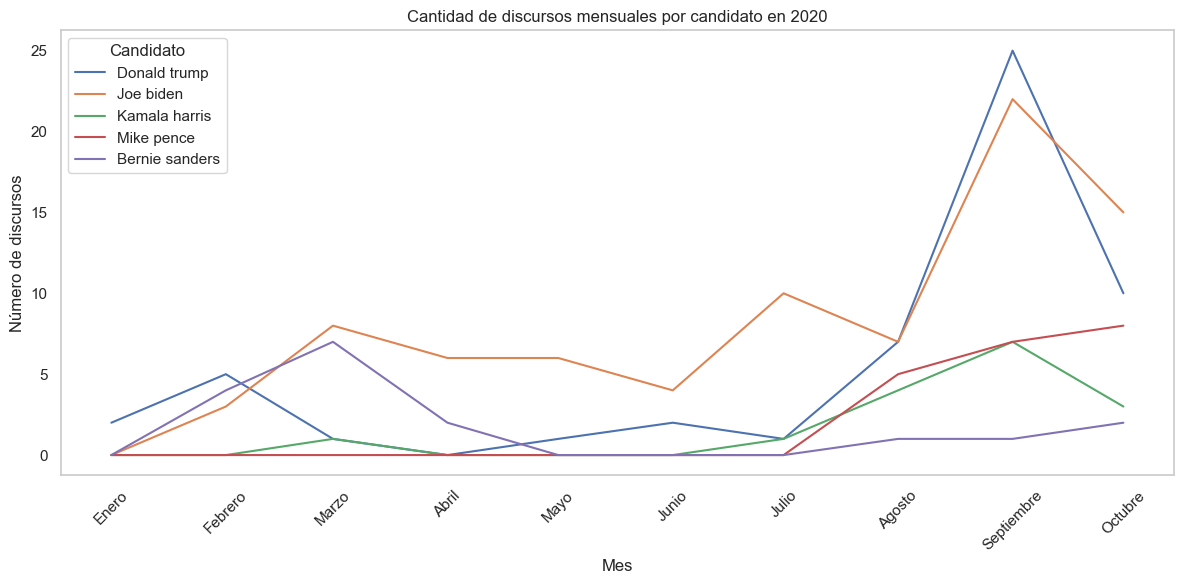

In [236]:
df_speeches_top_5['date'] = pd.to_datetime(df_speeches_top_5['date'])
df_speeches_top_5['month'] = df_speeches_top_5['date'].dt.to_period("M").dt.to_timestamp()

# Pivoteamos para tener los candidatos como columnas
df_pivot = df_count_pres.pivot(index='month', columns='speaker', values='count').fillna(0)

# Nos aseguramos de que los nombres coincidan (en minúsculas, sin espacios extra)
df_pivot.columns = df_pivot.columns.str.lower().str.strip()
speakers = [s.lower().strip() for s in speakers]

# Filtramos solo por los que están en el DataFrame
speakers_presentes = [s for s in speakers if s in df_pivot.columns]
df_pivot = df_pivot[speakers_presentes]

# Graficamos
plt.figure(figsize=(12, 6))
for speaker in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[speaker], label=speaker.capitalize())

# Nombres de meses con mayúscula
nombres_meses = [fecha.strftime('%B').capitalize() for fecha in df_pivot.index]
plt.xticks(ticks=df_pivot.index, labels=nombres_meses, rotation=45)

plt.grid()
plt.title('Cantidad de discursos mensuales por candidato en 2020')
plt.xlabel('Mes')
plt.ylabel('Número de discursos')
plt.legend(title='Candidato')
plt.tight_layout()
plt.show()

## Limpieza de Texto y Conteo de Palabras

In [238]:
def clean_text(df, column_name):

    # Eliminar primeras palabras hasta el primer "\n"
    result = df[column_name].str.replace(r"^[^\n]*\n", "", regex=True)

    # Convertir todo a minúsculas
    result = result.str.lower()

    # TODO: completar signos de puntuación faltantes
    for punc in ["[", "\n", ",", ":", "?"]:
        result = result.str.replace(punc, " ")
    
    return result

# TODO: Creamos una nueva columna CleanText a partir de text
df_speeches_top_5["CleanText"] = clean_text(df_speeches_top_5,'text')
df_speeches_top_5["CleanText"]

1      hello  michigan. hi  how are you  what’s your ...
2      thank you. what a nice group. thank you very m...
3      hey  and welcome to our town hall with joe bid...
4      it’s nothing but noise. what  okay. all right ...
5      thank you very much. thank you. let’s see  it’...
6      yeah  my name is pedro fuentes cid. i’m a cuba...
7      thank you very much. thank you very much  ever...
8      well hello  michigan. the peter meijer  the st...
9      please welcome  damian ferguson.\r damian ferg...
10     hello  johnstown. thank you very much. this is...
11     even when trump manages to respond to this cri...
12     hello  wisconsin. to congressman steil  congre...
13     hello everybody. hello orlando. hello sanford....
14     it’s good to be back. thank you. thank you. it...
15     well  i’ll tell you what. my dad was an automo...
16     hello ohio. the lieutenant governor husted  oh...
17     hello  hello  hello  hello. thank you  thank y...
18     … a widow and a dear fri

In [239]:
# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

,CleanText,WordList
1,hello michigan. hi how are you what’s your ...,"[hello, michigan., hi, how, are, you, what’s, ..."
2,thank you. what a nice group. thank you very m...,"[thank, you., what, a, nice, group., thank, yo..."
3,hey and welcome to our town hall with joe bid...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it’s nothing but noise. what okay. all right ...,"[it’s, nothing, but, noise., what, okay., all,..."
5,thank you very much. thank you. let’s see it’...,"[thank, you, very, much., thank, you., let’s, ..."
6,yeah my name is pedro fuentes cid. i’m a cuba...,"[yeah, my, name, is, pedro, fuentes, cid., i’m..."
7,thank you very much. thank you very much ever...,"[thank, you, very, much., thank, you, very, mu..."
8,well hello michigan. the peter meijer the st...,"[well, hello, michigan., the, peter, meijer, t..."
9,please welcome damian ferguson.\r damian ferg...,"[please, welcome, damian, ferguson., damian, f..."
10,hello johnstown. thank you very much. this is...,"[hello, johnstown., thank, you, very, much., t..."


In [240]:
# Separa contracciones y escribe de forma completa

contraction_list = {
    "let's": "let us",
    "what's": "what is",
    "it's": "it is",
    "you'll": "you will",
    "i'll": "i will",
    "i'm": "i am",
    "he'll": "he will",
    "she'll": "she will",
    "they'll": "they will",
    "we'll": "we will",
    "can't": "cannot",
    "won't": "will not",
    "doesn't": "does not",
    "don't": "do not",
    "isn't": "is not",
    "aren't": "are not",
    "hasn't": "has not",
    "haven't": "have not",
    "hadn't": "had not",
    "i've": "i have",
    "you've": "you have",
    "you're": "you are",
    "we've": "we have",
    "we're": "we are",
    "they're":"they are",
    "they've": "they have",
    "he's": "he is",
    "she's": "she is",
    "wasn't": "was not",
    "didn't": "did not",
    "that's": "that is",
    "here's": "here is",
    "they'll": "they will",
    "it'll": "it will",
    "weren't": "were not"}

# Remplazamos el apóstrofe gráfico
df_speeches_top_5["CleanText"] = df_speeches_top_5["CleanText"].apply(lambda x: x.replace("’", "'") if isinstance(x, str) else x)
def expand_contractions(text, contractions=contraction_list):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in contractions.keys()) + r')\b')
    return pattern.sub(lambda x: contractions[x.group()], text)

df_speeches_top_5["CleanText"] = df_speeches_top_5["CleanText"].apply(expand_contractions)
df_speeches_top_5["CleanText"]

# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_speeches_top_5["WordList"] = df_speeches_top_5["CleanText"].str.split()

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

,CleanText,WordList
1,hello michigan. hi how are you what is your...,"[hello, michigan., hi, how, are, you, what, is..."
2,thank you. what a nice group. thank you very m...,"[thank, you., what, a, nice, group., thank, yo..."
3,hey and welcome to our town hall with joe bid...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it is nothing but noise. what okay. all right...,"[it, is, nothing, but, noise., what, okay., al..."
5,thank you very much. thank you. let us see it...,"[thank, you, very, much., thank, you., let, us..."
6,yeah my name is pedro fuentes cid. i am a cub...,"[yeah, my, name, is, pedro, fuentes, cid., i, ..."
7,thank you very much. thank you very much ever...,"[thank, you, very, much., thank, you, very, mu..."
8,well hello michigan. the peter meijer the st...,"[well, hello, michigan., the, peter, meijer, t..."
9,please welcome damian ferguson.\r damian ferg...,"[please, welcome, damian, ferguson., damian, f..."
10,hello johnstown. thank you very much. this is...,"[hello, johnstown., thank, you, very, much., t..."


In [241]:
# Limpiamos los puntos de cada palabra de una lista
def limpiar_puntos(lista_palabras):
    # Sacar los puntos de cada palabra
    palabras_limpias = [palabra.replace('.', '') for palabra in lista_palabras]
    return palabras_limpias

# Aplicamos a toda la columna
df_speeches_top_5["WordList"] = df_speeches_top_5["WordList"].apply(limpiar_puntos)

# Veamos la nueva columna creada: notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_speeches_top_5[["CleanText", "WordList"]]

,CleanText,WordList
1,hello michigan. hi how are you what is your...,"[hello, michigan, hi, how, are, you, what, is,..."
2,thank you. what a nice group. thank you very m...,"[thank, you, what, a, nice, group, thank, you,..."
3,hey and welcome to our town hall with joe bid...,"[hey, and, welcome, to, our, town, hall, with,..."
4,it is nothing but noise. what okay. all right...,"[it, is, nothing, but, noise, what, okay, all,..."
5,thank you very much. thank you. let us see it...,"[thank, you, very, much, thank, you, let, us, ..."
6,yeah my name is pedro fuentes cid. i am a cub...,"[yeah, my, name, is, pedro, fuentes, cid, i, a..."
7,thank you very much. thank you very much ever...,"[thank, you, very, much, thank, you, very, muc..."
8,well hello michigan. the peter meijer the st...,"[well, hello, michigan, the, peter, meijer, th..."
9,please welcome damian ferguson.\r damian ferg...,"[please, welcome, damian, ferguson, damian, fe..."
10,hello johnstown. thank you very much. this is...,"[hello, johnstown, thank, you, very, much, thi..."


In [242]:
# Visualización de una transcripción
df_speeches_top_5
df_speeches_top_5["CleanText"].iloc[10]

"even when trump manages to respond to this crisis  he is put seniors in more danger. about one and three older floridians rely on social security as a sole source of their income and over four and a half million count on medicare  yet donald trump's executive orders threaten the survival and stability of these critical programs. make no mistake. neither of these men will walk into the white house without the blessing of florida's seniors. am i right \r audience  (00 32)\r right. right.\r speaker 1  (00 33)\r yes. there's no question about that. much has made in the rise of the youth vote  and thank god for it  but it is residents who are 65 and older who still swing elections here in the sunshine state. there's no doubt about that. the road to the white house travels through florida  and about three-quarters of our seniors turn up at the polls every single election.\r speaker 1  (00 56)\r while trump closes down the government's pandemic strike force  lies to americans about the threa

# Parte 2: Conteo de Palabras y Visualizaciones

 ## Candidatos con mayor cantidad de palabras

In [243]:
# TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as. 

def rank_words_speaker(df, word_column='WordList', speaker_column='speaker'):
    result = {}
    for speaker in df[speaker_column].unique():
        list_words = []
        subset = df[df[speaker_column] == speaker]
        for lista in subset[word_column]:
            if isinstance(lista, list):
                list_words.extend(lista)
        counter = Counter(list_words)
        result[speaker] = counter.most_common()  # Lista de tuplas (palabra, frecuencia) ordenadas
    return result
word_count_speaker = rank_words_speaker(df_speeches_top_5)

n = 10
for speaker, palabras in word_count_speaker.items():
    print(f"\n{speaker} - {n} palabras más usadas")
    for palabra, frecuencia in palabras[:n]:
        print(f"{palabra}: {frecuencia}")

# - Encuentra algún problema en los resultados?
# Al contar las palabras de todos los discursos en general, estamos comparando magnitudes que no son equivalentes. Esto se debe a que algunos 
# candidatos mencionaron más una palabra en particular simplemente porque dieron más discursos, y no necesariamente porque la utilicen con mayor 
# frecuencia. La escala tambien es un problema en la visualizacion, hay mucha diferencia en los datos.


Joe Biden - 10 palabras más usadas
the: 18979
to: 15954
and: 13643
i: 9420
is: 8884
of: 8764
a: 8632
that: 8535
you: 8303
we: 7924

Donald Trump - 10 palabras más usadas
the: 19770
and: 15548
to: 13971
i: 13086
you: 12441
we: 12333
is: 12041
a: 11578
it: 11440
that: 9799

Mike Pence - 10 palabras más usadas
the: 5729
and: 4556
to: 3739
of: 3068
in: 2385
we: 2184
that: 2002
i: 1965
you: 1950
a: 1809

Kamala Harris - 10 palabras más usadas
the: 3899
and: 2978
to: 2911
of: 2238
that: 1967
is: 1729
you: 1618
we: 1606
a: 1488
i: 1429

Bernie Sanders - 10 palabras más usadas
the: 3046
to: 2190
and: 1876
that: 1657
of: 1507
is: 1468
we: 1438
in: 1368
a: 1234
i: 1071


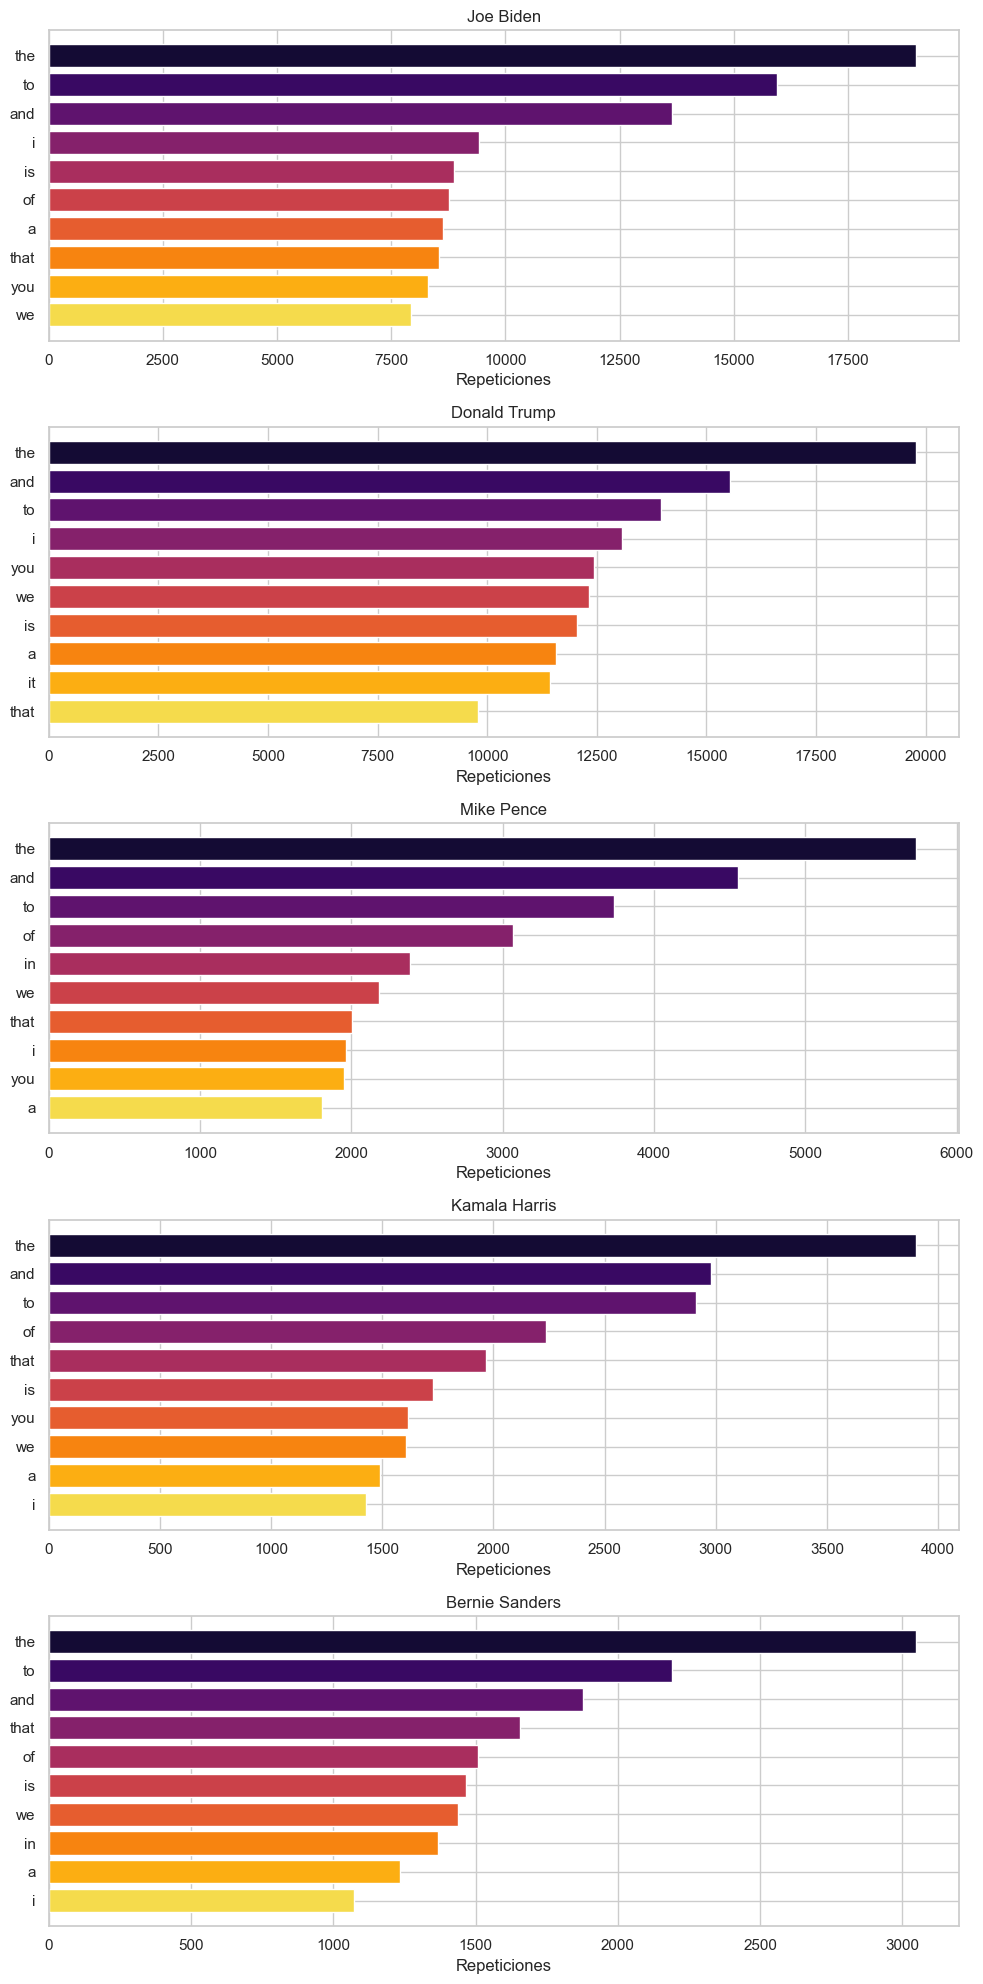

In [244]:
# TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as. 

speakers = list(word_count_speaker.keys())
n = 10

fig, axes = plt.subplots(5, 1, figsize=(10, 20))
axes = axes.flatten()  # Para indexarlos fácilmente

for idx, speaker in enumerate(speakers):
    top_words = word_count_speaker[speaker][:n]
    words, counts = zip(*top_words)
    ax = axes[idx]
    ax.barh(words, counts, color=sns.color_palette("inferno", n))
    ax.set_title(speaker)
    ax.invert_yaxis()  # Para que la palabra más dicha esté arriba
    ax.set_xlabel('Repeticiones')

plt.tight_layout()
plt.show()

# - Encuentra algún problema en los resultados?

Top palabras globales: ['the', 'to', 'and', 'i', 'is', 'of', 'a', 'that', 'you', 'we']
        Candidato    the     to    and      i     is    of      a  that  \
0       Joe Biden  18979  15954  13643   9420   8884  8764   8632  8535   
1    Donald Trump  19770  13971  15548  13086  12041  9080  11578  9799   
2      Mike Pence   5729   3739   4556   1965   1715  3068   1809  2002   
3   Kamala Harris   3899   2911   2978   1429   1729  2238   1488  1967   
4  Bernie Sanders   3046   2190   1876   1071   1468  1507   1234  1657   

     you     we  
0   8303   7924  
1  12441  12333  
2   1950   2184  
3   1618   1606  
4    979   1438  


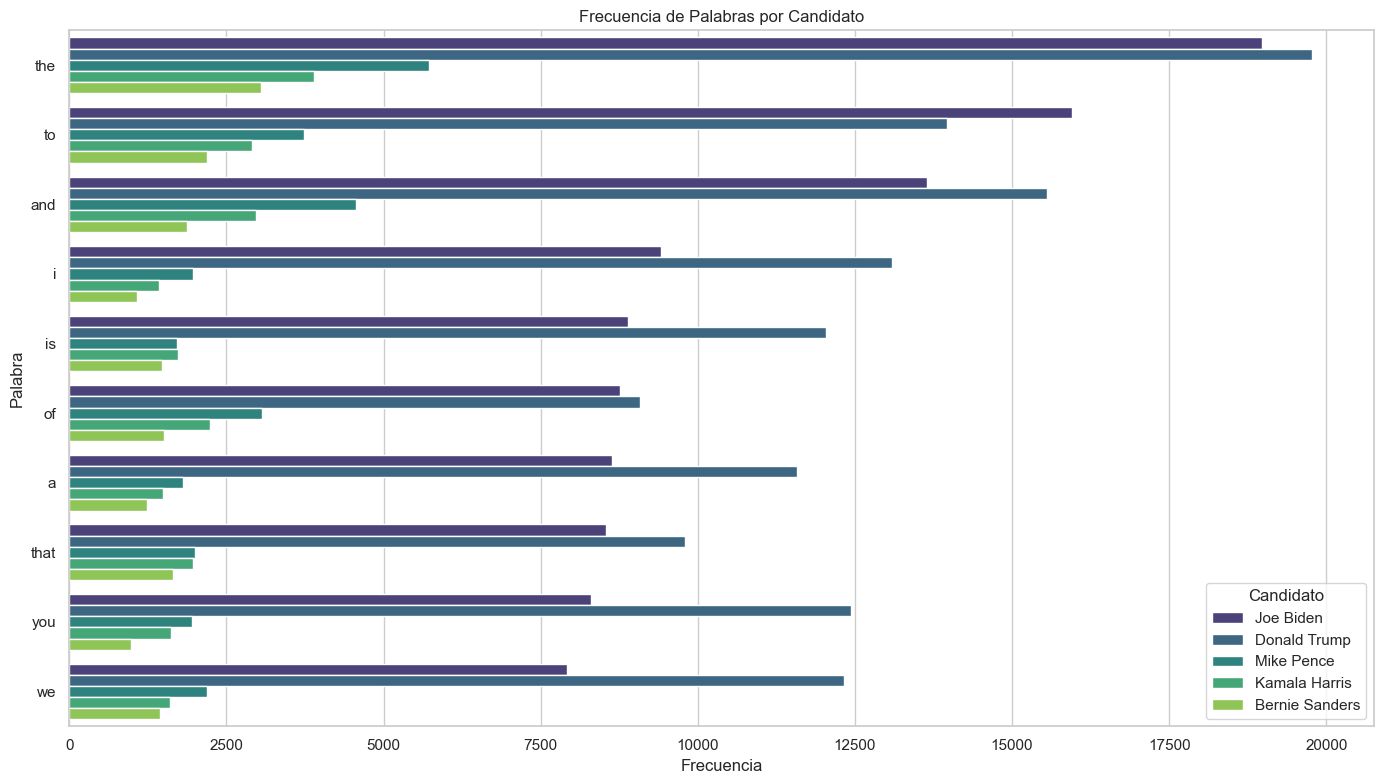

In [245]:
# TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as. 

# Juntamos todas las palabras de todos los candidatos
all_words = []
for palabras in word_count_speaker.values():
    all_words.extend([palabra for palabra, frecuencia in palabras])

# Contamos todas las palabras juntas
counter_all = Counter(all_words)

# Top 10 palabras más comunes globalmente
top_words_global = [palabra for palabra, frecuencia in counter_all.most_common(10)]
print("Top palabras globales:", top_words_global)

# Contruimos un dataframe con los datos
data = []
for speaker, palabras in word_count_speaker.items():
    contador = dict(palabras)     # Crea un diccionario temporal para el candidato
    row = {"Candidato": speaker}
    for palabra in top_words_global:
        row[palabra] = contador.get(palabra, 0)  # Si no dijo esa palabra, poner 0
    data.append(row)
df_words = pd.DataFrame(data)
print(df_words)

# Para que seaborn entienda mejor, tenemos que "derretir" el DataFrame
    # Formato ancho → cada palabra es una columna.
    # Formato largo → cada fila representa un único dato: (candidato, palabra, frecuencia)
df_melted = df_words.melt(id_vars='Candidato', var_name='Palabra', value_name='Frecuencia')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, y="Palabra", x="Frecuencia", hue="Candidato", palette="viridis")

plt.title('Frecuencia de Palabras por Candidato')
plt.ylabel('Palabra')
plt.xlabel('Frecuencia')
plt.legend(title='Candidato')
plt.tight_layout()
plt.show()

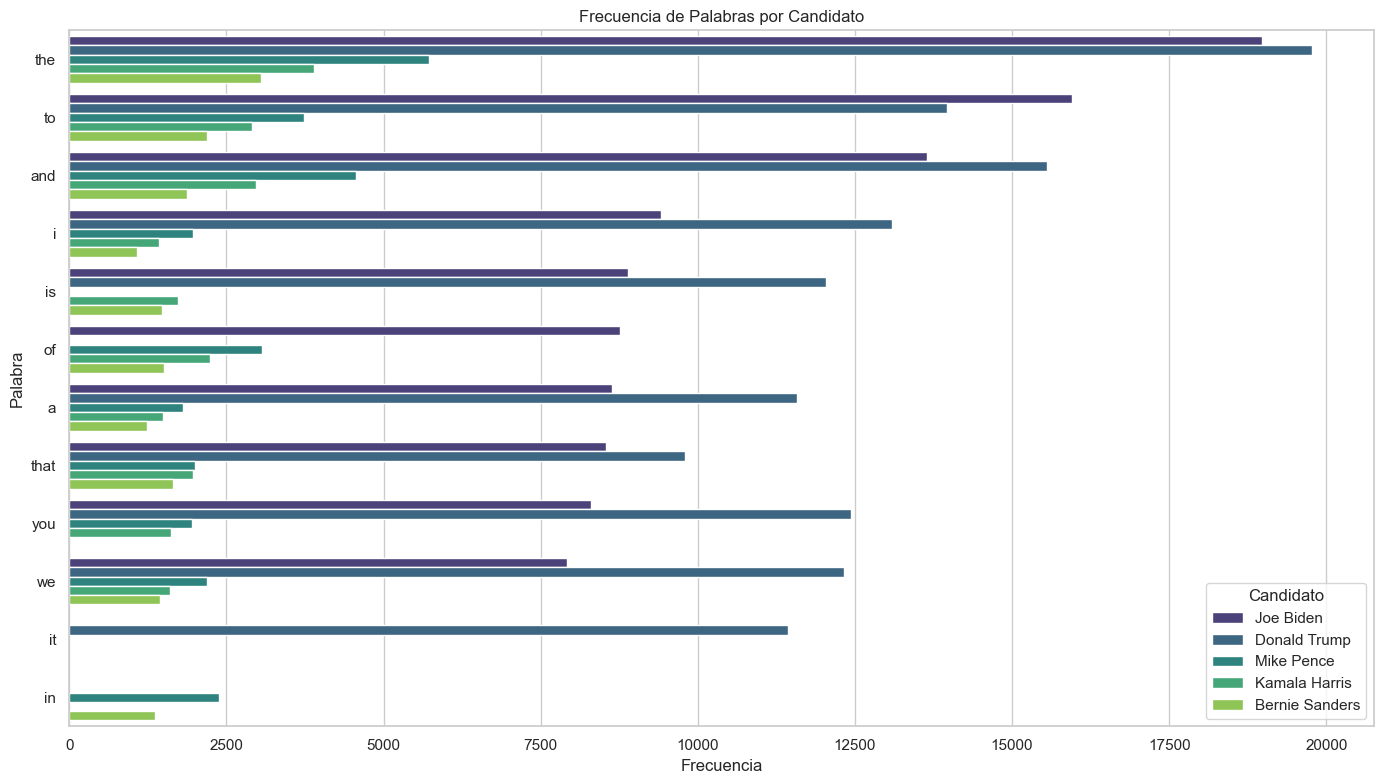

In [204]:
 # TODO: Realice una visualización que permita comparar las palabras más frecuentes de cada uno de los cinco candidatos/as. 
# Contamos las palabras
def rank_words_speaker(df, word_column='WordList', speaker_column='speaker'):
    result = {}
    for speaker in df[speaker_column].unique():
        list_words = []
        subset = df[df[speaker_column] == speaker]
        for lista in subset[word_column]:
            if isinstance(lista, list):
                list_words.extend(lista)
        counter = Counter(list_words)
        result[speaker] = counter.most_common()
    return result

word_count_speaker = rank_words_speaker(df_speeches_top_5)

# Top n palabras por candidato
n = 10
palabras_unicas = set()
for palabras in word_count_speaker.values():
    for palabra, _ in palabras[:n]:
        palabras_unicas.add(palabra)

palabras_unicas = sorted(list(palabras_unicas))

data = []
n = 10
for speaker, palabras in word_count_speaker.items():
    for palabra, frecuencia in palabras[:n]:
        data.append({
            "Candidato": speaker,
            "Palabra": palabra,
            "Frecuencia": frecuencia
        })

df_melted = pd.DataFrame(data)

# Visualización
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, y="Palabra", x="Frecuencia", hue="Candidato", palette="viridis")

plt.title('Frecuencia de Palabras por Candidato')
plt.ylabel('Palabra')
plt.xlabel('Frecuencia')
plt.legend(title='Candidato')
plt.tight_layout()
plt.show()


In [246]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.
total_word_speaker = {}

for speaker, palabras in word_count_speaker.items():
    total = sum(frecuencia for palabra, frecuencia in palabras)
    total_word_speaker[speaker] = total
# Los ordenamos de mayor a menor
total_word_speaker = dict(sorted(total_word_speaker.items(), key=lambda item: item[1], reverse=True))

for speaker, total in total_word_speaker.items():
    print(f"{speaker}: {total} palabras")

Donald Trump: 579305 palabras
Joe Biden: 468916 palabras
Mike Pence: 121546 palabras
Kamala Harris: 89725 palabras
Bernie Sanders: 68693 palabras


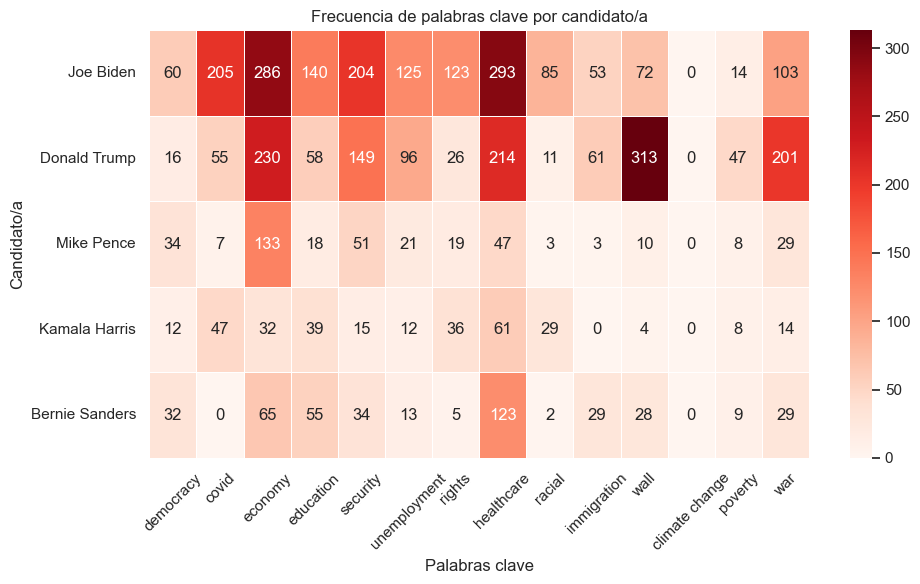

In [247]:
# Palabras clave que queremos analizar
keywords = ["democracy", "covid", "economy", "education", "security", "unemployment", "rights", 
            "healthcare", "racial", "immigration", "wall", "climate change", "poverty", "war"]

# Contamos las palabras clave por candidato
def count_keywords_per_speaker(df, keywords, word_column='WordList', speaker_column='speaker'):
    keyword_counts = {speaker: {kw: 0 for kw in keywords} for speaker in df[speaker_column].unique()}
    
    for speaker in df[speaker_column].unique():
        subset = df[df[speaker_column] == speaker]
        list_words = []
        for lista in subset[word_column]:
            if isinstance(lista, list):
                list_words.extend(lista)
        counter = Counter(list_words)
        for kw in keywords:
            keyword_counts[speaker][kw] = counter[kw]
    
    return pd.DataFrame(keyword_counts).T  # .T para que candidatos sean filas
keyword_counts_df = count_keywords_per_speaker(df_speeches_top_5, keywords)

# Visualización tipo heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(keyword_counts_df, annot=True, cmap="Reds", fmt="d", linewidths=.5)
plt.title('Frecuencia de palabras clave por candidato/a')
plt.ylabel('Candidato/a')
plt.xlabel('Palabras clave')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

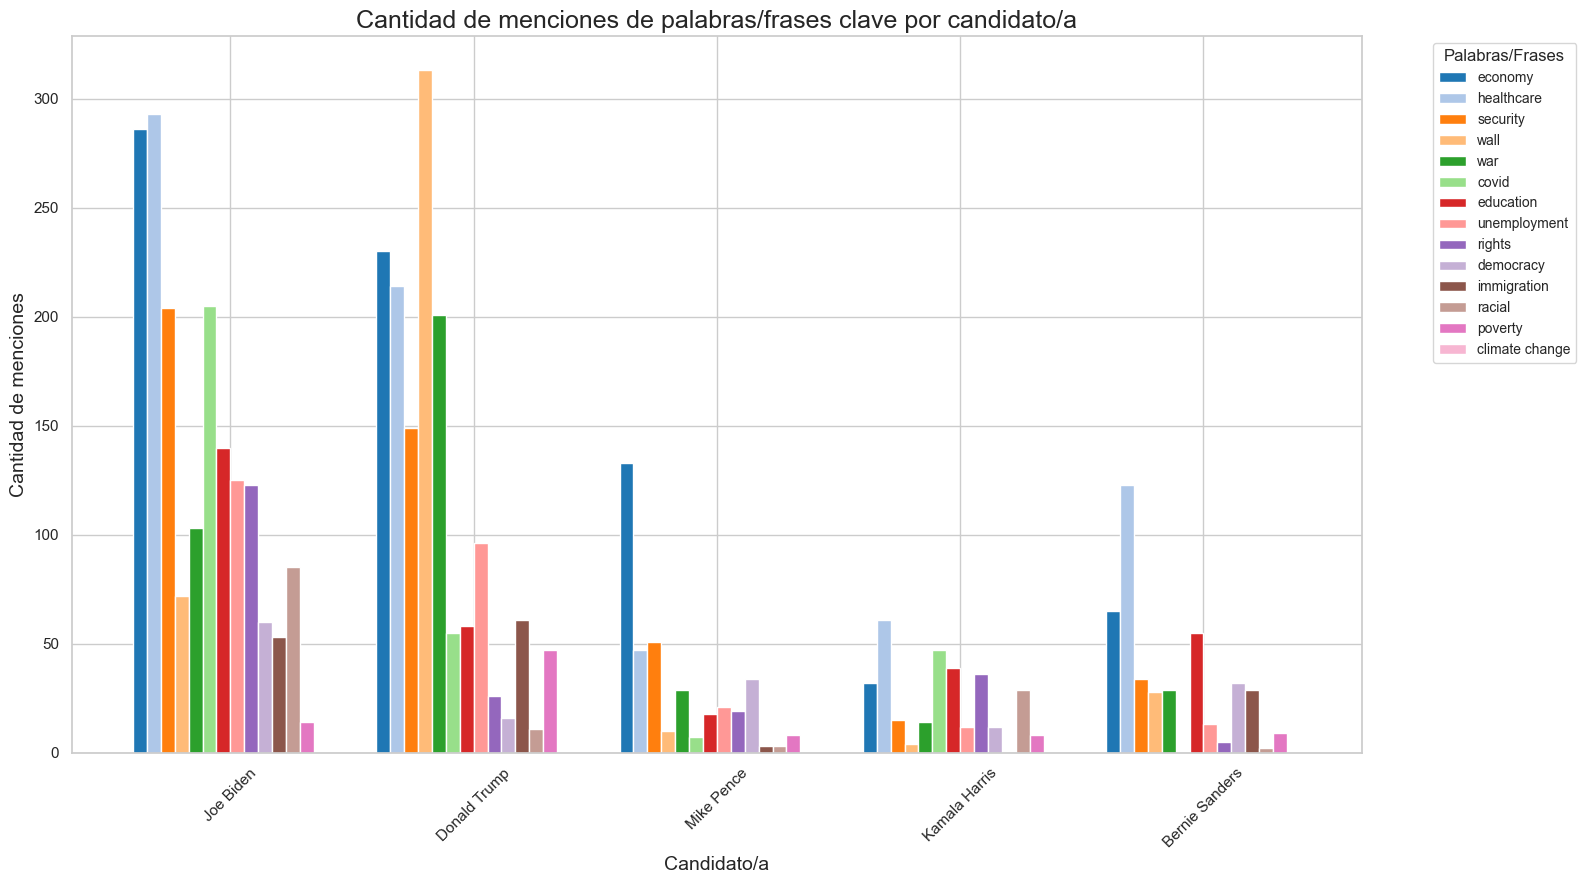

In [207]:
# Primero, ordenamos las palabras/frases según el total de menciones
word_totals = keyword_counts_df.sum(axis=0)
ordered_words = word_totals.sort_values(ascending=False).index.tolist()

# Reordenamos las columnas según ese orden
df_plot = keyword_counts_df[ordered_words]

# Definimos una paleta de colores bien variados
palette = sns.color_palette('tab20', n_colors=len(ordered_words))

# Ahora hacemos el gráfico de barras agrupadas
ax = df_plot.plot(
    kind='bar', 
    figsize=(16, 9),
    color=palette,
    width=0.8
)

plt.title('Cantidad de menciones de palabras/frases clave por candidato/a', fontsize=18)
plt.ylabel('Cantidad de menciones', fontsize=14)
plt.xlabel('Candidato/a', fontsize=14)
plt.xticks(rotation=45)
plt.legend(
    title='Palabras/Frases', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=10
)
plt.tight_layout()
plt.show()

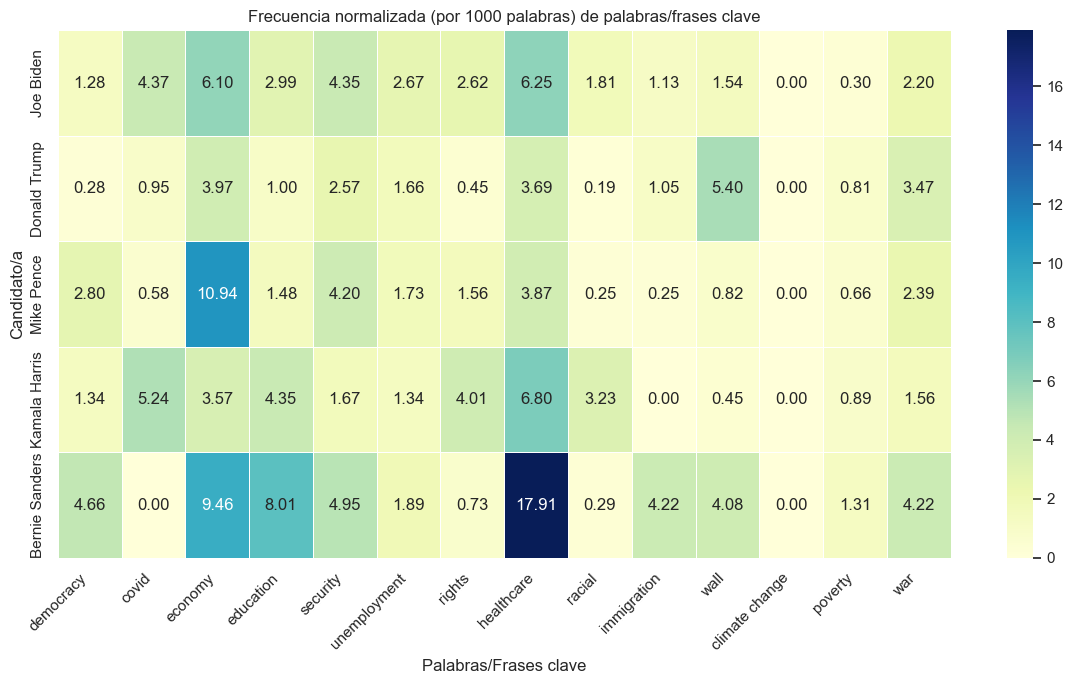

In [248]:
# Contamos palabras/frases clave y total de palabras
def count_and_normalize_keywords(df, keywords, word_column='WordList', speaker_column='speaker'):
    data = []
    for speaker in df[speaker_column].unique():
        subset = df[df[speaker_column] == speaker]
        list_words = []
        for lista in subset[word_column]:
            if isinstance(lista, list):
                list_words.extend(lista)
        total_words = len(list_words)
        counter = Counter(list_words)
        keyword_counts = {kw: counter[kw] for kw in keywords}
        # Normalizamos: frecuencia por 1000 palabras
        normalized_counts = {kw: (count / total_words) * 10000 for kw, count in keyword_counts.items()}
        normalized_counts['total_words'] = total_words
        normalized_counts['speaker'] = speaker
        data.append(normalized_counts)
        
    df_result = pd.DataFrame(data)
    return df_result.set_index('speaker')
normalized_keyword_df = count_and_normalize_keywords(df_speeches_top_5, keywords)

# Visualización tipo heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(normalized_keyword_df.drop(columns='total_words'), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Frecuencia normalizada (por 1000 palabras) de palabras/frases clave')
plt.ylabel('Candidato/a')
plt.xlabel('Palabras/Frases clave')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

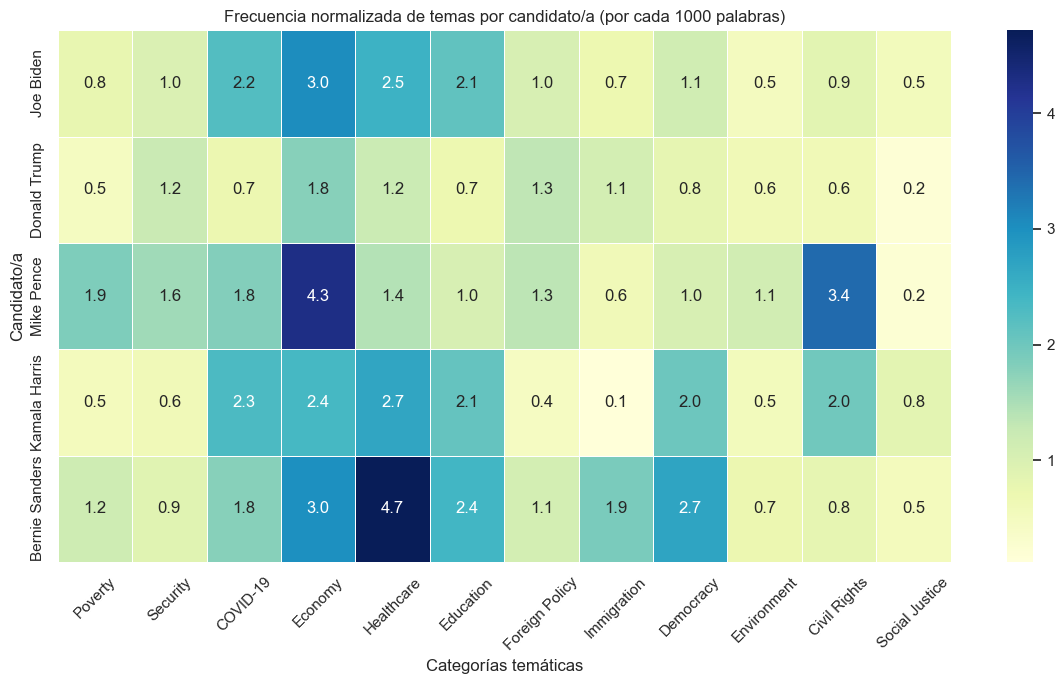

In [250]:
# Ampliación de las categorías

from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos categorías temáticas ampliadas
categories = {
    "Democracy": ["democracy", "democratic", "vote", "elections", "constitution", "freedom", "liberty", "civil liberties"],
    "Healthcare": ["healthcare", "health", "hospital", "medicare", "medicaid", "insurance", "medical", "vaccine"],
    "COVID-19": ["covid", "coronavirus", "pandemic", "lockdown", "virus", "outbreak", "quarantine", "testing"],
    "Economy": ["economy", "economic", "growth", "inflation", "gdp", "jobs", "employment", "unemployment", "wages", "recession", "recovery"],
    "Education": ["education", "school", "schools", "college", "university", "tuition", "student loans", "teachers", "literacy"],
    "Security": ["security", "national security", "terrorism", "crime", "defense", "military", "army", "police", "threat", "cyber"],
    "Civil Rights": ["rights", "civil rights", "equality", "justice", "liberties", "freedom", "discrimination", "constitution", "liberty"],
    "Social Justice": ["racial", "race", "racism", "inequality", "black lives matter", "blm", "discrimination"],
    "Immigration": ["immigration", "immigrant", "immigrants", "border", "wall", "asylum", "refugee", "deportation", "citizenship", "undocumented"],
    "Environment": ["climate change", "environment", "global warming", "emissions", "carbon", "renewable", "green", "energy", "sustainability"],
    "Poverty": ["poverty", "poor", "welfare", "assistance", "hunger", "food stamps", "low-income", "support"],
    "Foreign Policy": ["war", "troops", "iraq", "afghanistan", "foreign", "diplomacy", "military", "international", "allies", "intervention"]
}

# Creamos un diccionario palabra - categoría
word_to_category = {}
for category, words in categories.items():
    for word in words:
        word_to_category[word.lower()] = category

# Creamos una función para conteo y normalización
def count_normalized_categories(df, word_column='WordList', speaker_column='speaker'):
    category_counts = defaultdict(lambda: defaultdict(int))
    total_words = defaultdict(int)
    
    for speaker in df[speaker_column].unique():
        subset = df[df[speaker_column] == speaker]
        for word_list in subset[word_column]:
            if isinstance(word_list, list):
                for word in word_list:
                    word_lc = word.lower()
                    total_words[speaker] += 1  # Contar cada palabra
                    if word_lc in word_to_category:
                        category = word_to_category[word_lc]
                        category_counts[speaker][category] += 1

# Convertimos a DataFrame y preparamos para normalización
    df_counts = pd.DataFrame(category_counts).T.fillna(0)
    df_counts = df_counts.astype(float)  # Evita el warning al asignar floats

# Normalizamos por cada 1000 palabras
    for speaker in df_counts.index:
        if total_words[speaker] > 0:
            df_counts.loc[speaker] = (df_counts.loc[speaker] / total_words[speaker]) * 1000

    return df_counts

# Aplicamos al DataFrame
normalized_category_counts_df = count_normalized_categories(df_speeches_top_5)

# Visualización
plt.figure(figsize=(12, 7))
sns.heatmap(normalized_category_counts_df, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title('Frecuencia normalizada de temas por candidato/a (por cada 1000 palabras)')
plt.ylabel('Candidato/a')
plt.xlabel('Categorías temáticas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

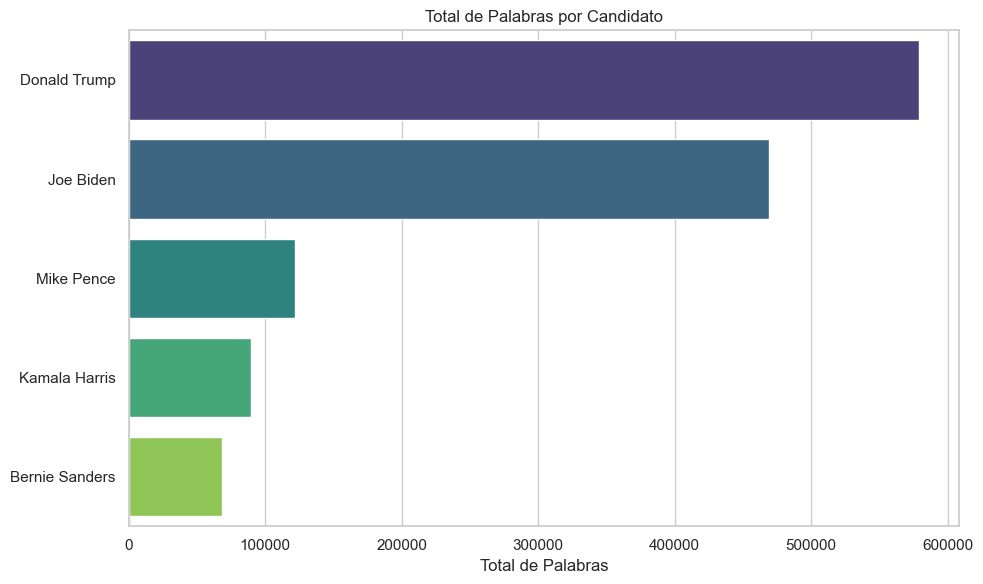

In [251]:
# TODO: Busque los candidatos/as con mayor cantidad de palabras.

speakers = list(total_word_speaker.keys())
totales = list(total_word_speaker.values())

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=totales, y=speakers, hue=speakers, palette="viridis", dodge=False, legend=False)

plt.xlabel('Total de Palabras')
plt.title('Total de Palabras por Candidato')
plt.tight_layout()
plt.show()

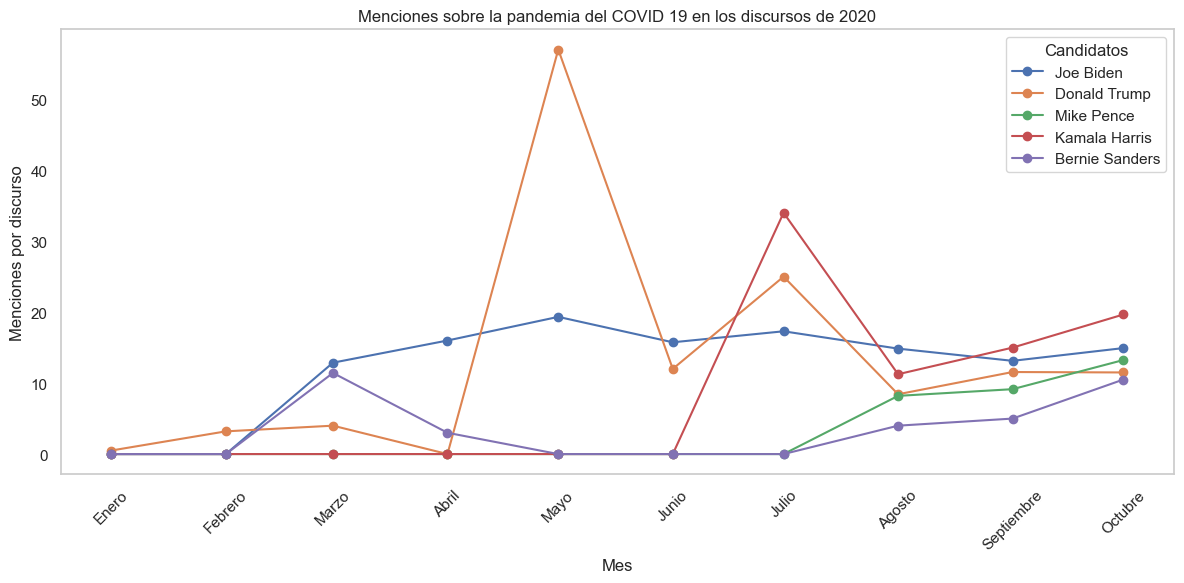

In [254]:
# Contamos palabras/frases clave en funcion del tiempo.
# Lista de palabras clave en inglés
pandemic_words = ['covid', 'coronavirus', 'pandemic', 'quarantine', 'vaccine', 'virus', 'mask', 'contagion']

# Función para contar menciones
def count_pandemic_mentions(wordlist):
    if isinstance(wordlist, list):
        return sum(1 for word in wordlist if word.lower() in pandemic_words)
    return 0

# Aplicar la función
df_speeches_top_5['pandemic_mentions'] = df_speeches_top_5['WordList'].apply(count_pandemic_mentions)

# Total de menciones
df_mentions = df_speeches_top_5.groupby(['month', 'speaker'])['pandemic_mentions'].sum().reset_index(name='mentions')

# Total de discursos
df_counts = df_speeches_top_5.groupby(['month', 'speaker']).size().reset_index(name='num_speeches')

# Unir ambos
df_merged = pd.merge(df_mentions, df_counts, on=['month', 'speaker'])

# Calcular menciones normalizadas
df_merged['normalized_mentions'] = df_merged['mentions'] / df_merged['num_speeches']

speakers = list(df_speeches_top_5['speaker'].unique())
df_pivot = df_merged.pivot(index='month', columns='speaker', values='normalized_mentions').fillna(0)
df_pivot = df_pivot[speakers]  # ordenar por orden original

# Graficar
plt.figure(figsize=(12, 6))
for speaker in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[speaker], marker='o', label=speaker)
plt.grid()
#Nombres de meses con mayúscula
nombres_meses = [fecha.strftime('%B').capitalize() for fecha in df_pivot.index]
plt.xticks(ticks=df_pivot.index, labels=nombres_meses, rotation=45)
plt.title('Menciones sobre la pandemia del COVID 19 en los discursos de 2020')
plt.xlabel('Mes')
plt.ylabel('Menciones por discurso')
plt.xticks(rotation=45)
plt.legend(title='Candidatos')
plt.tight_layout()
plt.show()

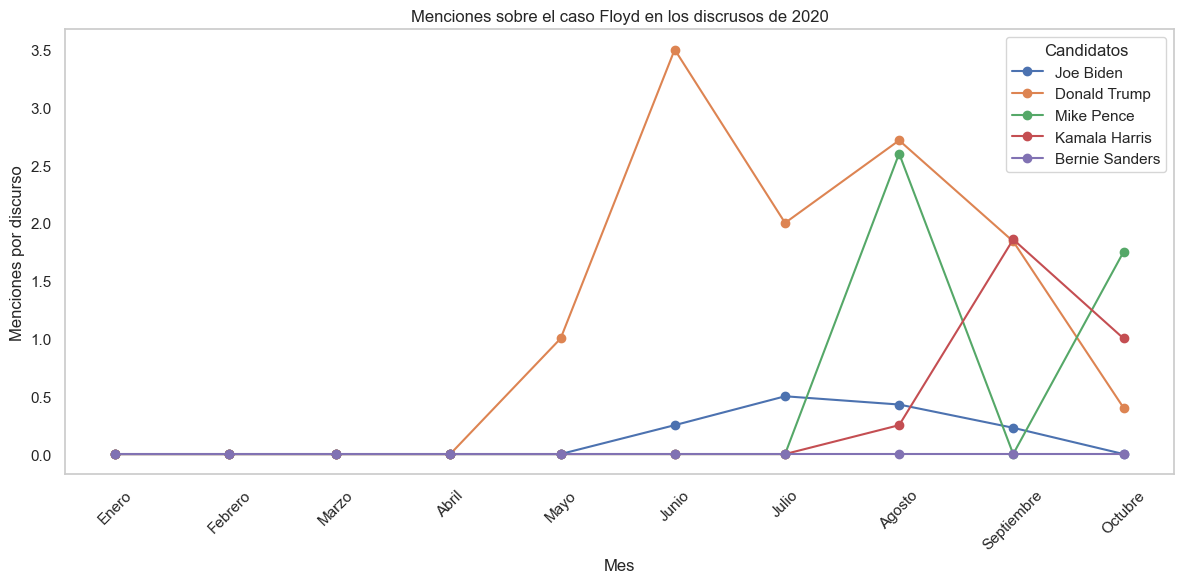

In [255]:
# Contamos palabras/frases clave en funcion del tiempo.
# Lista de palabras clave en inglés
Floyd_words = ["floyd", "minneapolis","police violence","police misconduct","Chauvin", "racial injustice","black lives matter","blm"]

# Función para contar menciones
def count_Floyd_mentions(wordlist):
    if isinstance(wordlist, list):
        return sum(1 for word in wordlist if word.lower() in Floyd_words)
    return 0

# Aplicar la función
df_speeches_top_5['Floyd_mentions'] = df_speeches_top_5['WordList'].apply(count_Floyd_mentions)

# Total de menciones
df_mentions = df_speeches_top_5.groupby(['month', 'speaker'])['Floyd_mentions'].sum().reset_index(name='mentions')

# Total de discursos
df_counts = df_speeches_top_5.groupby(['month', 'speaker']).size().reset_index(name='num_speeches')

# Unir ambos
df_merged = pd.merge(df_mentions, df_counts, on=['month', 'speaker'])

# Calcular menciones normalizadas
df_merged['normalized_mentions'] = df_merged['mentions'] / df_merged['num_speeches']

speakers = list(df_speeches_top_5['speaker'].unique())
df_pivot = df_merged.pivot(index='month', columns='speaker', values='normalized_mentions').fillna(0)
df_pivot = df_pivot[speakers]  # ordenar por orden original

# Graficar
plt.figure(figsize=(12, 6))
for speaker in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[speaker], marker='o', label=speaker)
plt.grid()
#Nombres de meses con mayúscula
nombres_meses = [fecha.strftime('%B').capitalize() for fecha in df_pivot.index]
plt.xticks(ticks=df_pivot.index, labels=nombres_meses, rotation=45)
plt.title('Menciones sobre el caso Floyd en los discrusos de 2020')
plt.xlabel('Mes')
plt.ylabel('Menciones por discurso')
plt.xticks(rotation=45)
plt.legend(title='Candidatos')
plt.tight_layout()
plt.show()

                donald trump  joe biden  kamala harris  mike pence  \
donald trump               0        280            104         360   
joe biden                647          0            233         477   
kamala harris             17         92              0         156   
mike pence                46          6            118           0   
bernie sanders            57        154              1           7   

                bernie sanders  
donald trump                62  
joe biden                  225  
kamala harris                1  
mike pence                   0  
bernie sanders               0  


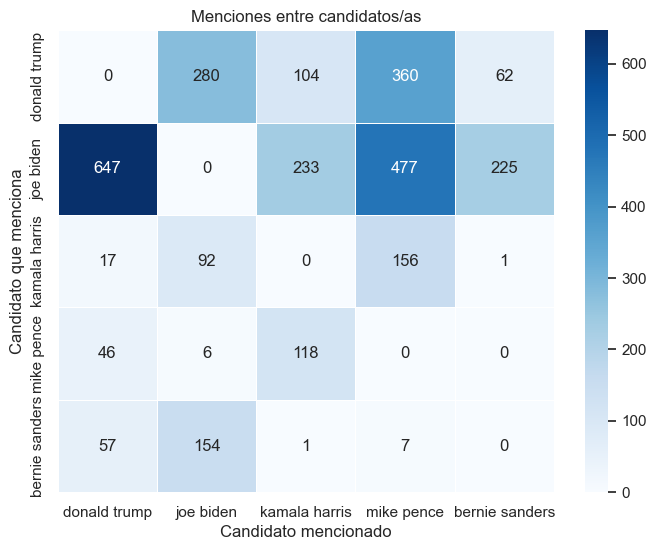

In [256]:
# TODO: Construya una matriz de 5x5, donde cada fila y columna corresponden a un candiato/a, 
# y la entrada (i,j) contiene la cantidad de veces que el candiato/a “i” menciona al candiato/a “j”.

# Lista de candidatos:
speakers = ["donald trump", "joe biden", "kamala harris", "mike pence", "bernie sanders"]

# Creamos un diccionario vacío para almacenar las menciones
mentions_matrix = {candidate: {c: 0 for c in speakers} for candidate in speakers}

# Recorremos cada discurso
for idx, row in df_speeches_top_5.iterrows():
    speaker = row['speaker'].lower()  # Pasamos a minúsculas
    text = row['CleanText'].lower()
    
    for other_speaker in speakers:  # Recorremos todos los candidatos
        if speaker != other_speaker:  # Evitamos automenciones
            mentions = text.count(other_speaker)
            mentions_matrix[speaker][other_speaker] += mentions

# Convertimos el diccionario a un DataFrame
mentions_matrix_df = pd.DataFrame(mentions_matrix, index=speakers, columns=speakers)
print(mentions_matrix_df)

# Heatmap de visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(mentions_matrix_df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title('Menciones entre candidatos/as')
plt.ylabel('Candidato que menciona')
plt.xlabel('Candidato mencionado')
plt.show()

# mentions_matrix = ...

# Opcional: Genere un grafo dirigido con esa matriz de adyacencia para visualizar las menciones. 
# Puede ser util la biblioteca networkx

                Donald Trump  Joe Biden  Kamala Harris  Mike Pence  \
Donald Trump               0       1348            209         652   
Joe Biden               1705          0            428         540   
Kamala Harris            104        149              0         225   
Mike Pence               260         33            181           0   
Bernie Sanders           250        240              6          11   

                Bernie Sanders  
Donald Trump               157  
Joe Biden                  397  
Kamala Harris                1  
Mike Pence                   0  
Bernie Sanders               0  


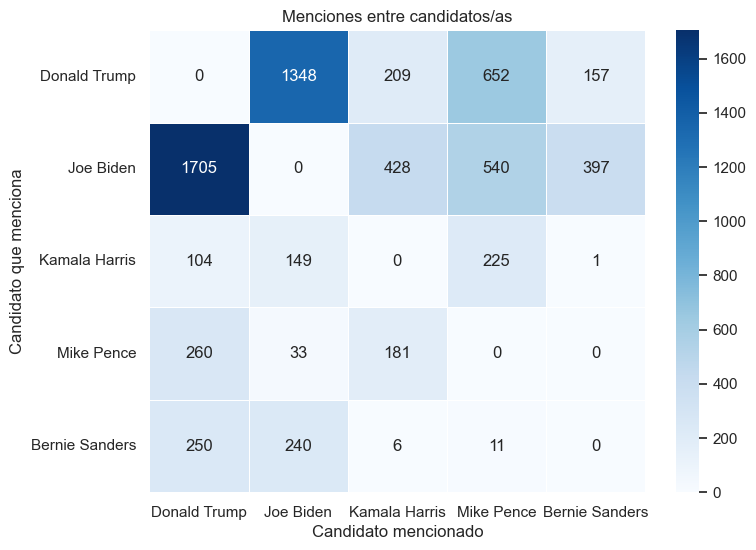

In [257]:
# Lista de variantes posibles para cada candidato
candidate_variants = {
    "donald trump": ["donald trump", "donald", "trump"],
    "joe biden": ["joe biden", "joe", "biden"],
    "kamala harris": ["kamala harris", "kamala", "harris"],
    "mike pence": ["mike pence", "mike", "pence"],
    "bernie sanders": ["bernie sanders", "bernie", "sanders"]}

speakers = list(candidate_variants.keys())
capitalized_speakers = [speaker.title() for speaker in speakers]  # Usamos las versiones capitalizadas

# Creamos un diccionario vacío para almacenar las menciones con las claves capitalizadas
mentions_matrix = {candidate.title(): {c.title(): 0 for c in speakers} for candidate in speakers}

# Recorremos cada discurso
for idx, row in df_speeches_top_5.iterrows():
    speaker = row['speaker'].lower()  # Asumimos que 'speaker' está en minúsculas
    text = row['CleanText'].lower()
    
    if speaker in speakers:
        for other_speaker in speakers:
            if speaker != other_speaker:
                total_mentions = 0
                temp_text = text  # Hacemos una copia del texto
                # Ordenamos las variantes (las más largas primero)
                variants = sorted(candidate_variants[other_speaker], key=lambda x: -len(x))
                
                for variant in variants:
                    pattern = r'\b' + re.escape(variant) + r'\b'
                    matches = list(re.finditer(pattern, temp_text))
                    total_mentions += len(matches)
                    
                    # Eliminamos las coincidencias encontradas para evitar doble conteo
                    temp_text = re.sub(pattern, ' ', temp_text)
                
                mentions_matrix[speaker.title()][other_speaker.title()] += total_mentions

# Convertimos el diccionario a un DataFrame
mentions_matrix_df = pd.DataFrame(mentions_matrix, index=capitalized_speakers, columns=capitalized_speakers)

# Convertir todos los valores a enteros (asegurándonos de que sean del tipo correcto)
mentions_matrix_df = mentions_matrix_df.astype(int)

# Mostrar el DataFrame
print(mentions_matrix_df)

# Heatmap para visualización
plt.figure(figsize=(8, 6))
sns.heatmap(mentions_matrix_df, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title('Menciones entre candidatos/as')
plt.ylabel('Candidato que menciona')
plt.xlabel('Candidato mencionado')
plt.show()